# Testing Neural Network

In [1]:
# importing libraries

from neural_network import *
import matplotlib.pyplot as plt

### Initializing Scatater Plot Data

[]

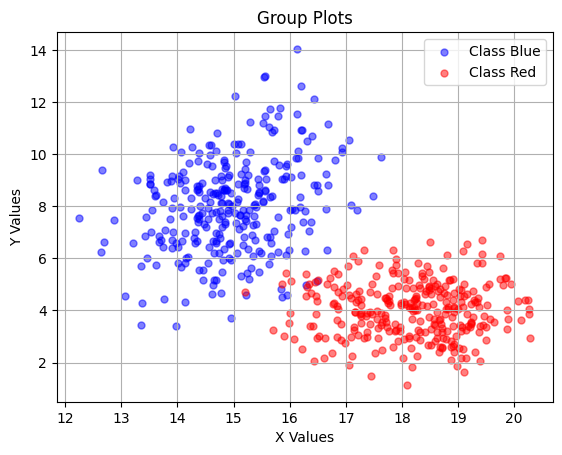

In [15]:
mean_1 = [15, 8]
covariance_1 = [
    [1, 0.5],
    [0.5, 3]
]

mean_2 = [18, 4]
covariance_2 = [
    [1, 0],
    [0, 1]
]

num_points = 300

# generating data
data_1 = np.random.multivariate_normal(mean_1, covariance_1, num_points)
data_2 = np.random.multivariate_normal(mean_2, covariance_2, num_points)

# separate x and y
x_1 = data_1[:, 0]
y_1 = data_1[:, 1]

x_2 = data_2[:, 0]
y_2 = data_2[:, 1]

# creating scatter plot
plt.scatter(x_1, y_1, alpha=0.5, s=25, color='blue', label='Class Blue')
plt.scatter(x_2, y_2, alpha=0.5, s=25, color='red', label='Class Red')

plt.title('Group Plots')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)
plt.legend(loc='upper right')

plt.plot()

### Data Prep

In [32]:
# combining x & y values
combined_1 = [[x_1[i], y_1[i]] for i in range(len(x_1))]
combined_2 = [[x_2[i], y_2[i]] for i in range(len(x_2))]

# creating our data set for our neural network
inputs = []
actual_values = []

for i in range(len(combined_1)):
    # adding data from group Blue
    inputs.append(combined_1[i])
    actual_values.append([1])
for i in range(len(combined_2)):
    # adding data from group Red
    inputs.append(combined_2[i])
    actual_values.append([0])



for i in range(10):
    print(f'{inputs[i]} ==> {actual_values[i]}')
print('='*80)
for i in range(295, 305):
    print(f'{inputs[i]} ==> {actual_values[i]}')
print('='*80)
for i in range(400, 410):
    print(f'{inputs[i]} ==> {actual_values[i]}')

[np.float64(13.513892828083025), np.float64(8.841635968828935)] ==> [1]
[np.float64(15.104149584958803), np.float64(7.141386650816424)] ==> [1]
[np.float64(14.369918402356726), np.float64(9.734297201431936)] ==> [1]
[np.float64(15.983535412879167), np.float64(6.329866138952151)] ==> [1]
[np.float64(13.355950279468413), np.float64(3.4217635996531275)] ==> [1]
[np.float64(15.657393742720897), np.float64(6.826126855938347)] ==> [1]
[np.float64(14.540391790637246), np.float64(7.5232939181227865)] ==> [1]
[np.float64(16.94143951024867), np.float64(10.221110037713851)] ==> [1]
[np.float64(15.850055695676343), np.float64(4.805040829281269)] ==> [1]
[np.float64(15.568109660418333), np.float64(8.634757695075892)] ==> [1]
[np.float64(14.025665953036688), np.float64(9.145038141497142)] ==> [1]
[np.float64(14.715246246220786), np.float64(8.421906249664117)] ==> [1]
[np.float64(16.392837533096788), np.float64(10.696815850300858)] ==> [1]
[np.float64(16.925406768634893), np.float64(10.08968164169167

### Training Neural Network

In [33]:
alpha = 0.1
epochs = 200

nn1 = Neural_Network(
    input_layer_num_nodes=2,
    hidden_layer_dimensions=[3],
    output_layer_num_nodes=1,
    alias='nn1',
    activation_functions=[relu, sigmoid],
    weight_normalizations=[he_normal, xavier_normal]
)

nn1.multi_run_learn_data(input_list=inputs, expected_list=actual_values, learning_rate=alpha, epochs=epochs)

In [37]:
# classifying each data point into either group Blue (1) or Red (0)
predict_values = []

for i in range(len(inputs)):
    predict_value = nn1.get_output(inputs[i])

    # collapsing float to a binary output
    if predict_value < 0.5:
        predict_value = 0
    else:
        predict_value = 1

    predict_values.append([predict_value])



for i in range(10):
    print(f'{inputs[i]} ==> predict {predict_values[i][0]} vs actual {actual_values[i][0]}')
print('='*80)
for i in range(295, 305):
    print(f'{inputs[i]} ==> predict {predict_values[i][0]} vs actual {actual_values[i][0]}')
print('='*80)
for i in range(400, 410):
    print(f'{inputs[i]} ==> predict {predict_values[i][0]} vs actual {actual_values[i][0]}')

[np.float64(13.513892828083025), np.float64(8.841635968828935)] ==> predict 1 vs actual 1
[np.float64(15.104149584958803), np.float64(7.141386650816424)] ==> predict 1 vs actual 1
[np.float64(14.369918402356726), np.float64(9.734297201431936)] ==> predict 1 vs actual 1
[np.float64(15.983535412879167), np.float64(6.329866138952151)] ==> predict 1 vs actual 1
[np.float64(13.355950279468413), np.float64(3.4217635996531275)] ==> predict 0 vs actual 1
[np.float64(15.657393742720897), np.float64(6.826126855938347)] ==> predict 1 vs actual 1
[np.float64(14.540391790637246), np.float64(7.5232939181227865)] ==> predict 1 vs actual 1
[np.float64(16.94143951024867), np.float64(10.221110037713851)] ==> predict 1 vs actual 1
[np.float64(15.850055695676343), np.float64(4.805040829281269)] ==> predict 0 vs actual 1
[np.float64(15.568109660418333), np.float64(8.634757695075892)] ==> predict 1 vs actual 1
[np.float64(14.025665953036688), np.float64(9.145038141497142)] ==> predict 1 vs actual 1
[np.floa

### Evaluating Neural Network Training

In [38]:
correct_x_coord = []
correct_y_coord = []

incorrect_x_coord = []
incorrect_y_coord = []

# comparing predict vs actual and putting into the corresponding bucket
for i in range(len(predict_values)):
    if predict_values[i][0] == actual_values[i][0]:
        # correct classification
        correct_x_coord.append(inputs[i][0])
        correct_y_coord.append(inputs[i][1])
    else:
        # incorrect classification
        incorrect_x_coord.append(inputs[i][0])
        incorrect_y_coord.append(inputs[i][1])

In [41]:
print(f'Num Correct: {len(correct_x_coord)} [{100*len(correct_x_coord) / (2*num_points)}%]')
print(f'Num Incorrect: {len(incorrect_x_coord)} [{100*len(incorrect_x_coord) / (2*num_points)}%]')

Num Correct: 567 [94.5%]
Num Incorrect: 33 [5.5%]


[]

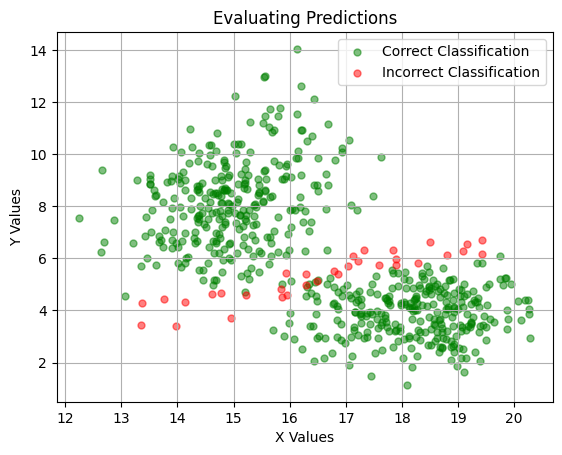

In [43]:
plt.scatter(correct_x_coord, correct_y_coord, alpha=0.5, s=25, color='green', label='Correct Classification')
plt.scatter(incorrect_x_coord, incorrect_y_coord, alpha=0.5, s=25, color='red', label='Incorrect Classification')

plt.title('Evaluating Predictions')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)
plt.legend(loc='upper right')

plt.plot()